([<matplotlib.axis.XTick at 0x7f80576c4630>,
 <a list of 6 Text xticklabel objects>)

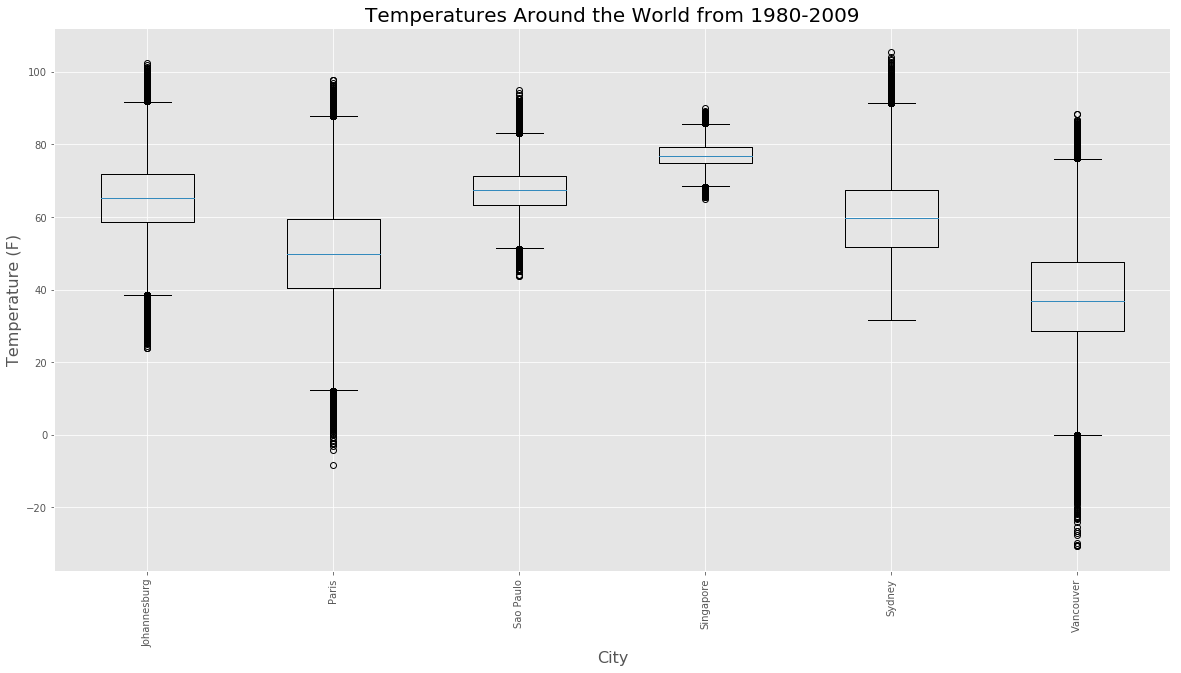

In [30]:
#Part A
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.io import loadmat
from scipy import stats as stats

matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20, 10)

johannesburg = loadmat('Johannesburg.mat')
paris = loadmat('Paris.mat')
saoPaulo = loadmat('SaoPaulo.mat')
singapore = loadmat('Singapore.mat')
sydney = loadmat('Sydney.mat')
vancouver = loadmat('Vancouver.mat')

#1: Convert from Kelvin -> Fahrenheit
johannesburg = johannesburg['temperature'] * (9/5) - 459.67
paris = paris['temperature'] * (9/5) - 459.67
saoPaulo = saoPaulo['temperature'] * (9/5) - 459.67
singapore = singapore['temperature'] * (9/5) - 459.67
sydney = sydney['temperature'] * (9/5) - 459.67
vancouver = vancouver['temperature'] * (9/5) - 459.67

#2: Box and Whisker Diagram
plotData = [johannesburg,paris,saoPaulo,singapore,sydney,vancouver]
plt.boxplot(plotData)
plt.title('Temperatures Around the World from 1980-2009', fontsize = 20)
plt.ylabel('Temperature (F)', fontsize = 16)
plt.xlabel('City', fontsize = 16)
cities = ['Johannesburg','Paris','Sao Paulo','Singapore','Sydney','Vancouver']
plt.xticks([1,2,3,4,5,6], cities, rotation = 90)

We can see in this diagram that Vancouver has a large variance in temperature over throughout the year, while Singapore's temperature range is much more confined.  All six cities have highest temperature around 100 degrees Farenheit, but the lowest temperature varies drastically.

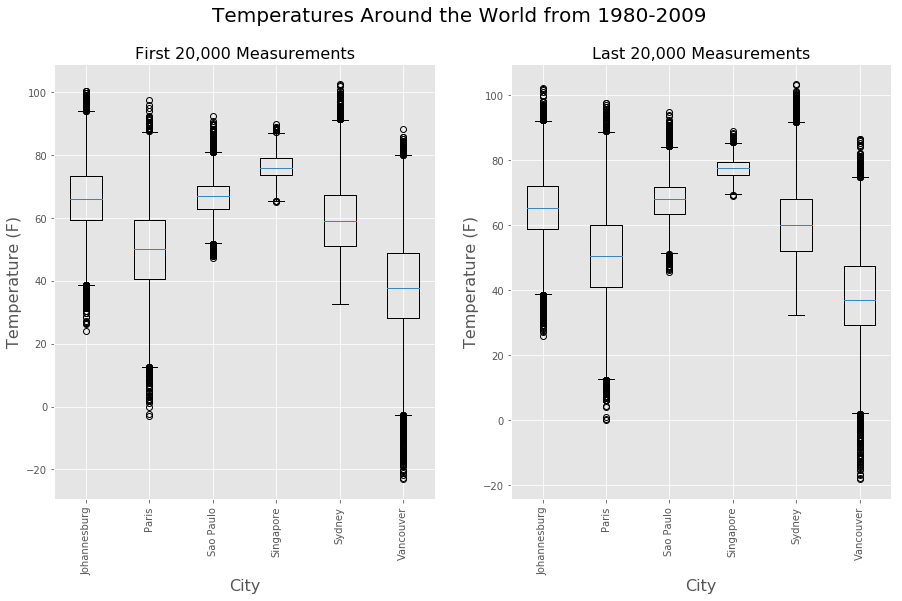

In [164]:
#3: First and last 20,000 measurements
firstJohannesburg = johannesburg[0:20000]
firstParis = paris[0:20000]
firstSaoPaulo = saoPaulo[0:20000]
firstSingapore = singapore[0:20000]
firstSydney = sydney[0:20000]
firstVancouver = vancouver[0:20000]

plotData1 = [firstJohannesburg,firstParis,firstSaoPaulo,firstSingapore,firstSydney,firstVancouver]

lastJohannesburg = johannesburg[69792:]
lastParis = paris[69792:]
lastSaoPaulo = saoPaulo[69792:]
lastSingapore = singapore[69792:]
lastSydney = sydney[69792:]
lastVancouver = vancouver[69792:]

plotData2 = [lastJohannesburg,lastParis,lastSaoPaulo,lastSingapore,lastSydney,lastVancouver]

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

cities = ['Johannesburg','Paris','Sao Paulo','Singapore','Sydney','Vancouver']

firstbp = ax1.boxplot(plotData1)
ax1.set_title('First 20,000 Measurements', fontsize = 16)
ax1.set_ylabel('Temperature (F)', fontsize = 16)
ax1.set_xlabel('City', fontsize = 16)
ax1.set_xticklabels(cities, rotation = 90)

lastbp = ax2.boxplot(plotData2)
ax2.set_title('Last 20,000 Measurements', fontsize = 16)
ax2.set_ylabel('Temperature (F)', fontsize = 16)
ax2.set_xlabel('City', fontsize = 16)
ax2.set_xticklabels(cities, rotation = 90)

plt.suptitle('Temperatures Around the World from 1980-2009', fontsize = 20)

It is difficult to see any trends between the older and newer data with the current formatting.  The graphs look roughly the same excluding some very minor differences.

In [2]:
import pandas as pd

#Part B
johannesburg = loadmat('Johannesburg.mat')
paris = loadmat('Paris.mat')
saoPaulo = loadmat('SaoPaulo.mat')
singapore = loadmat('Singapore.mat')
sydney = loadmat('Sydney.mat')
vancouver = loadmat('Vancouver.mat')

johannesburg['temperature'] = johannesburg['temperature'] * (9/5) - 459.67
paris['temperature'] = paris['temperature'] * (9/5) - 459.67
saoPaulo['temperature'] = saoPaulo['temperature'] * (9/5) - 459.67
singapore['temperature'] = singapore['temperature'] * (9/5) - 459.67
sydney['temperature'] = sydney['temperature'] * (9/5) - 459.67
vancouver['temperature'] = vancouver['temperature'] * (9/5) - 459.67

In [4]:
#Creating Johannesburg Dataframe
dfJohannesburg = pd.DataFrame([johannesburg['time'],johannesburg['temperature']], index = ['DT','Temperature'])
dfJohannesburg = dfJohannesburg.transpose()
dfJohannesburg.index = pd.to_datetime(dfJohannesburg.pop('DT'))

In [5]:
#Creating avg seasonal temp arrays for Johannesburg
winterJohannesburg = np.array([0])
for x in range(1948,2008):
    winterTemps = dfJohannesburg.Temperature[str(x) + '-01']
    winterTemps = pd.concat([winterTemps, dfJohannesburg.Temperature[str(x) + '-02'], dfJohannesburg.Temperature[str(x) + '-12']])
    winterJohannesburg = np.concatenate([winterJohannesburg, winterTemps.mean()])
    
winterJohannesburg = winterJohannesburg[1:]

springJohannesburg = np.array([0])
for x in range(1948,2008):
    springTemps = dfJohannesburg.Temperature[str(x) + '-03']
    springTemps = pd.concat([springTemps, dfJohannesburg.Temperature[str(x) + '-04'], dfJohannesburg.Temperature[str(x) + '-05']])
    springJohannesburg = np.concatenate([springJohannesburg, springTemps.mean()])
    
springJohannesburg = springJohannesburg[1:]

summerJohannesburg = np.array([0])
for x in range(1948,2008):
    summerTemps = dfJohannesburg.Temperature[str(x) + '-06']
    summerTemps = pd.concat([summerTemps, dfJohannesburg.Temperature[str(x) + '-07'], dfJohannesburg.Temperature[str(x) + '-08']])
    summerJohannesburg = np.concatenate([summerJohannesburg, summerTemps.mean()])
    
summerJohannesburg = summerJohannesburg[1:]

fallJohannesburg = np.array([0])
for x in range(1948,2008):
    fallTemps = dfJohannesburg.Temperature[str(x) + '-09']
    fallTemps = pd.concat([fallTemps, dfJohannesburg.Temperature[str(x) + '-10'], dfJohannesburg.Temperature[str(x) + '-11']])
    fallJohannesburg = np.concatenate([fallJohannesburg, fallTemps.mean()])
    
fallJohannesburg = fallJohannesburg[1:]

In [6]:
#Creating Paris Dataframe
dfParis = pd.DataFrame([paris['time'],paris['temperature']], index = ['DT','Temperature'])
dfParis = dfParis.transpose()
dfParis.index = pd.to_datetime(dfParis.pop('DT'))

In [7]:
#Creating avg seasonal temp arrays for Paris
winterParis = np.array([0])
for x in range(1948,2008):
    winterTemps = dfParis.Temperature[str(x) + '-01']
    winterTemps = pd.concat([winterTemps, dfParis.Temperature[str(x) + '-02'], dfParis.Temperature[str(x) + '-12']])
    winterParis = np.concatenate([winterParis, winterTemps.mean()])
    
winterParis = winterParis[1:]

springParis = np.array([0])
for x in range(1948,2008):
    springTemps = dfParis.Temperature[str(x) + '-03']
    springTemps = pd.concat([springTemps, dfParis.Temperature[str(x) + '-04'], dfParis.Temperature[str(x) + '-05']])
    springParis = np.concatenate([springParis, springTemps.mean()])
    
springParis = springParis[1:]

summerParis = np.array([0])
for x in range(1948,2008):
    summerTemps = dfParis.Temperature[str(x) + '-06']
    summerTemps = pd.concat([summerTemps, dfParis.Temperature[str(x) + '-07'], dfParis.Temperature[str(x) + '-08']])
    summerParis = np.concatenate([summerParis, summerTemps.mean()])
    
summerParis = summerParis[1:]

fallParis = np.array([0])
for x in range(1948,2008):
    fallTemps = dfParis.Temperature[str(x) + '-09']
    fallTemps = pd.concat([fallTemps, dfParis.Temperature[str(x) + '-10'], dfParis.Temperature[str(x) + '-11']])
    fallParis = np.concatenate([fallParis, fallTemps.mean()])
    
fallParis = fallParis[1:]

In [8]:
#Creating Sao Paulo Dataframe
dfSaoPaulo = pd.DataFrame([saoPaulo['time'],saoPaulo['temperature']], index = ['DT','Temperature'])
dfSaoPaulo = dfSaoPaulo.transpose()
dfSaoPaulo.index = pd.to_datetime(dfSaoPaulo.pop('DT'))

In [9]:
#Creating avg seasonal temp arrays for Sao Paulo
winterSaoPaulo = np.array([0])
for x in range(1948,2008):
    winterTemps = dfSaoPaulo.Temperature[str(x) + '-01']
    winterTemps = pd.concat([winterTemps, dfSaoPaulo.Temperature[str(x) + '-02'], dfSaoPaulo.Temperature[str(x) + '-12']])
    winterSaoPaulo = np.concatenate([winterSaoPaulo, winterTemps.mean()])
    
winterSaoPaulo = winterSaoPaulo[1:]

springSaoPaulo = np.array([0])
for x in range(1948,2008):
    springTemps = dfSaoPaulo.Temperature[str(x) + '-03']
    springTemps = pd.concat([springTemps, dfSaoPaulo.Temperature[str(x) + '-04'], dfSaoPaulo.Temperature[str(x) + '-05']])
    springSaoPaulo = np.concatenate([springSaoPaulo, springTemps.mean()])
    
springSaoPaulo = springSaoPaulo[1:]

summerSaoPaulo = np.array([0])
for x in range(1948,2008):
    summerTemps = dfSaoPaulo.Temperature[str(x) + '-06']
    summerTemps = pd.concat([summerTemps, dfSaoPaulo.Temperature[str(x) + '-07'], dfSaoPaulo.Temperature[str(x) + '-08']])
    summerSaoPaulo = np.concatenate([summerSaoPaulo, summerTemps.mean()])
    
summerSaoPaulo = summerSaoPaulo[1:]

fallSaoPaulo = np.array([0])
for x in range(1948,2008):
    fallTemps = dfSaoPaulo.Temperature[str(x) + '-09']
    fallTemps = pd.concat([fallTemps, dfSaoPaulo.Temperature[str(x) + '-10'], dfSaoPaulo.Temperature[str(x) + '-11']])
    fallSaoPaulo = np.concatenate([fallSaoPaulo, fallTemps.mean()])
    
fallSaoPaulo = fallSaoPaulo[1:]

In [10]:
#Creating Singapore Dataframe
dfSingapore = pd.DataFrame([singapore['time'],singapore['temperature']], index = ['DT','Temperature'])
dfSingapore = dfSingapore.transpose()
dfSingapore.index = pd.to_datetime(dfSingapore.pop('DT'))

In [11]:
#Creating avg seasonal temp arrays for Singapore
winterSingapore = np.array([0])
for x in range(1948,2008):
    winterTemps = dfSingapore.Temperature[str(x) + '-01']
    winterTemps = pd.concat([winterTemps, dfSingapore.Temperature[str(x) + '-02'], dfSingapore.Temperature[str(x) + '-12']])
    winterSingapore = np.concatenate([winterSingapore, winterTemps.mean()])
    
winterSingapore = winterSingapore[1:]

springSingapore = np.array([0])
for x in range(1948,2008):
    springTemps = dfSingapore.Temperature[str(x) + '-03']
    springTemps = pd.concat([springTemps, dfSingapore.Temperature[str(x) + '-04'], dfSingapore.Temperature[str(x) + '-05']])
    springSingapore = np.concatenate([springSingapore, springTemps.mean()])
    
springSingapore = springSingapore[1:]

summerSingapore = np.array([0])
for x in range(1948,2008):
    summerTemps = dfSingapore.Temperature[str(x) + '-06']
    summerTemps = pd.concat([summerTemps, dfSingapore.Temperature[str(x) + '-07'], dfSingapore.Temperature[str(x) + '-08']])
    summerSingapore = np.concatenate([summerSingapore, summerTemps.mean()])
    
summerSingapore = summerSingapore[1:]

fallSingapore = np.array([0])
for x in range(1948,2008):
    fallTemps = dfSingapore.Temperature[str(x) + '-09']
    fallTemps = pd.concat([fallTemps, dfSingapore.Temperature[str(x) + '-10'], dfSingapore.Temperature[str(x) + '-11']])
    fallSingapore = np.concatenate([fallSingapore, fallTemps.mean()])
    
fallSingapore = fallSingapore[1:]

In [12]:
#Creating Sydney Dataframe
dfSydney = pd.DataFrame([sydney['time'],sydney['temperature']], index = ['DT','Temperature'])
dfSydney = dfSydney.transpose()
dfSydney.index = pd.to_datetime(dfSydney.pop('DT'))

In [13]:
#Creating avg seasonal temp arrays for Sydney
winterSydney = np.array([0])
for x in range(1948,2008):
    winterTemps = dfSydney.Temperature[str(x) + '-01']
    winterTemps = pd.concat([winterTemps, dfSydney.Temperature[str(x) + '-02'], dfSydney.Temperature[str(x) + '-12']])
    winterSydney = np.concatenate([winterSydney, winterTemps.mean()])
    
winterSydney = winterSydney[1:]

springSydney = np.array([0])
for x in range(1948,2008):
    springTemps = dfSydney.Temperature[str(x) + '-03']
    springTemps = pd.concat([springTemps, dfSydney.Temperature[str(x) + '-04'], dfSydney.Temperature[str(x) + '-05']])
    springSydney = np.concatenate([springSydney, springTemps.mean()])
    
springSydney = springSydney[1:]

summerSydney = np.array([0])
for x in range(1948,2008):
    summerTemps = dfSydney.Temperature[str(x) + '-06']
    summerTemps = pd.concat([summerTemps, dfSydney.Temperature[str(x) + '-07'], dfSydney.Temperature[str(x) + '-08']])
    summerSydney = np.concatenate([summerSydney, summerTemps.mean()])
    
summerSydney = summerSydney[1:]

fallSydney = np.array([0])
for x in range(1948,2008):
    fallTemps = dfSydney.Temperature[str(x) + '-09']
    fallTemps = pd.concat([fallTemps, dfSydney.Temperature[str(x) + '-10'], dfSydney.Temperature[str(x) + '-11']])
    fallSydney = np.concatenate([fallSydney, fallTemps.mean()])
    
fallSydney = fallSydney[1:]

In [14]:
#Creating Vancouver Dataframe
dfVancouver = pd.DataFrame([vancouver['time'],vancouver['temperature']], index = ['DT','Temperature'])
dfVancouver = dfVancouver.transpose()
dfVancouver.index = pd.to_datetime(dfVancouver.pop('DT'))

In [15]:
#Creating avg seasonal temp arrays for Vancouver
winterVancouver = np.array([0])
for x in range(1948,2008):
    winterTemps = dfVancouver.Temperature[str(x) + '-01']
    winterTemps = pd.concat([winterTemps, dfVancouver.Temperature[str(x) + '-02'], dfVancouver.Temperature[str(x) + '-12']])
    winterVancouver = np.concatenate([winterVancouver, winterTemps.mean()])
    
winterVancouver = winterVancouver[1:]

springVancouver = np.array([0])
for x in range(1948,2008):
    springTemps = dfVancouver.Temperature[str(x) + '-03']
    springTemps = pd.concat([springTemps, dfVancouver.Temperature[str(x) + '-04'], dfVancouver.Temperature[str(x) + '-05']])
    springVancouver = np.concatenate([springVancouver, springTemps.mean()])
    
springVancouver = springVancouver[1:]

summerVancouver = np.array([0])
for x in range(1948,2008):
    summerTemps = dfVancouver.Temperature[str(x) + '-06']
    summerTemps = pd.concat([summerTemps, dfVancouver.Temperature[str(x) + '-07'], dfVancouver.Temperature[str(x) + '-08']])
    summerVancouver = np.concatenate([summerVancouver, summerTemps.mean()])
    
summerVancouver = summerVancouver[1:]

fallVancouver = np.array([0])
for x in range(1948,2008):
    fallTemps = dfVancouver.Temperature[str(x) + '-09']
    fallTemps = pd.concat([fallTemps, dfVancouver.Temperature[str(x) + '-10'], dfVancouver.Temperature[str(x) + '-11']])
    fallVancouver = np.concatenate([fallVancouver, fallTemps.mean()])
    
fallVancouver = fallVancouver[1:]

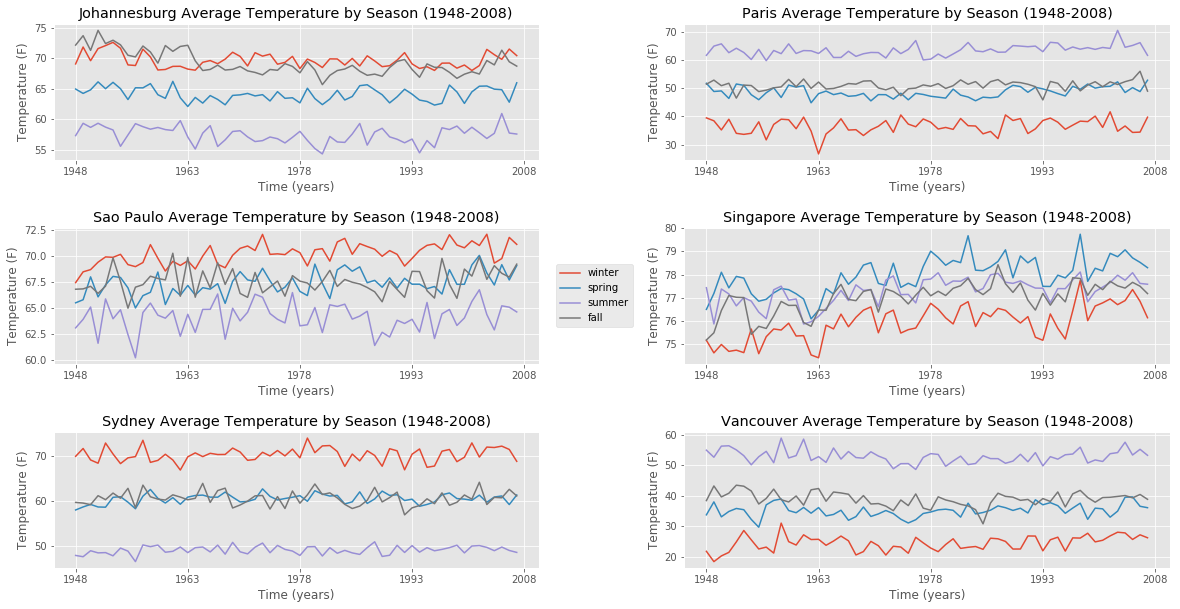

In [85]:
import matplotlib.gridspec as gridspec

#Plotting all data together

gs = gridspec.GridSpec(3,2)
gs.update(wspace = 0.3, hspace = 0.5)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])
ax5 = plt.subplot(gs[2,0])
ax6 = plt.subplot(gs[2,1])

ticks = [0,15,30,45,60]
years = ['1948','1963','1978','1993','2008']

ax1.plot(winterJohannesburg, label = 'winter')
ax1.plot(springJohannesburg, label = 'spring')
ax1.plot(summerJohannesburg, label = 'summer')
ax1.plot(fallJohannesburg, label = 'fall')
ax1.set_title('Johannesburg Average Temperature by Season (1948-2008)')
ax1.set_xticks(ticks)
ax1.set_xticklabels(years)
ax1.set_ylabel('Temperature (F)')
ax1.set_xlabel('Time (years)')
#ax1.set_ylim(ymin = 15, ymax = 80)

ax2.plot(winterParis, label = 'winter')
ax2.plot(springParis, label = 'spring')
ax2.plot(summerParis, label = 'summer')
ax2.plot(fallParis, label = 'fall')
ax2.set_title('Paris Average Temperature by Season (1948-2008)')
ax2.set_xticks(ticks)
ax2.set_xticklabels(years)
ax2.set_ylabel('Temperature (F)')
ax2.set_xlabel('Time (years)')
#ax2.set_ylim(ymin = 15, ymax = 80)

ax3.plot(winterSaoPaulo, label = 'winter')
ax3.plot(springSaoPaulo, label = 'spring')
ax3.plot(summerSaoPaulo, label = 'summer')
ax3.plot(fallSaoPaulo, label = 'fall')
ax3.set_title('Sao Paulo Average Temperature by Season (1948-2008)')
ax3.set_xticks(ticks)
ax3.set_xticklabels(years)
ax3.set_ylabel('Temperature (F)')
ax3.set_xlabel('Time (years)')
#ax3.set_ylim(ymin = 15, ymax = 80)

ax4.plot(winterSingapore, label = 'winter')
ax4.plot(springSingapore, label = 'spring')
ax4.plot(summerSingapore, label = 'summer')
ax4.plot(fallSingapore, label = 'fall')
ax4.set_title('Singapore Average Temperature by Season (1948-2008)')
ax4.set_xticks(ticks)
ax4.set_xticklabels(years)
ax4.set_ylabel('Temperature (F)')
ax4.set_xlabel('Time (years)')
#ax4.set_ylim(ymin = 15, ymax = 80)

ax5.plot(winterSydney, label = 'winter')
ax5.plot(springSydney, label = 'spring')
ax5.plot(summerSydney, label = 'summer')
ax5.plot(fallSydney, label = 'fall')
ax5.set_title('Sydney Average Temperature by Season (1948-2008)')
ax5.set_xticks(ticks)
ax5.set_xticklabels(years)
ax5.set_ylabel('Temperature (F)')
ax5.set_xlabel('Time (years)')
#ax5.set_ylim(ymin = 15, ymax = 80)

ax6.plot(winterVancouver, label = 'winter')
ax6.plot(springVancouver, label = 'spring')
ax6.plot(summerVancouver, label = 'summer')
ax6.plot(fallVancouver, label = 'fall')
ax6.set_title('Vancouver Average Temperature by Season (1948-2008)')
ax6.set_xticks(ticks)
ax6.set_xticklabels(years)
ax6.set_ylabel('Temperature (F)')
ax6.set_xlabel('Time (years)')
#ax6.set_ylim(ymin = 15, ymax = 80)

plt.legend(loc = (-0.265,1.77))

As expected, we can see that seasonal temperature averages have opposite readings for cities above the equator versus cities below the equator.  The temperatures of Singapore and Sao Paulo have been trending upward throughout the years while most others have remained fairly stable.  Johannesburg has seen a slight decline in winter and fall temperatures since 1948.